<a href="https://colab.research.google.com/github/HarshaV05/LegalAndEthicalPractice-Team03/blob/master/05_Practical_Visualisation_and_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 5 - practical visualisation

## Saving Jupyter notebooks
There are two practical ways to save a Jupyter notebook:
1. as ipynb
 * either just hit ctrl-S, or via menu File -> Save As...
2. as HTML
 * via menu File -> Download as -> HTML (.html)
 
**For the assignment you'll need to use both!**


## New idioms
### preliminaries - load iris 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets as data
import numpy as np
%matplotlib inline
iris = data.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
irisdf = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
irisdf['target'] = iris['target']
target_dict = dict(zip(range(3),iris['target_names']))
irisdf['species'] = [target_dict[int(t)] for t in iris['target']]
target_dict

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [3]:
irisdf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


### make figure of specific size, decorate with axis labels of specific font

Text(0, 0.5, 'sepal length (cm)')

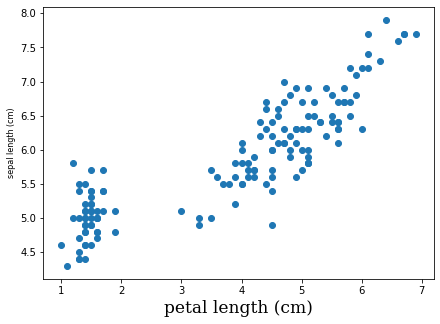

In [5]:
f = plt.figure(figsize=(7,5)) # makes a figure 7 inches wide, 5 inches high
ax = f.gca() # instead of plt.gca()
xvar = 'petal length (cm)'
yvar = 'sepal length (cm)'
ax.scatter(irisdf[xvar], irisdf[yvar])
ax.set_xlabel(xvar, size=17, family='serif')
ax.set_ylabel(yvar, size=8, family='sans serif')

#### Task
* Set both axis labels to 10 pt sans-serif font.
* change figure size to 5 inches wide, 3 inches tall. 

### Colormaps

We have previously seen colormaps for matrices:

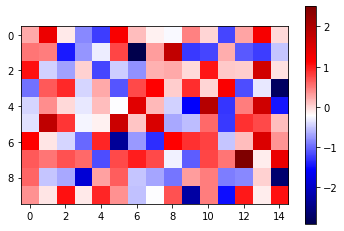

In [6]:
mat = np.random.randn(10,15)
f = plt.figure()
ax = f.gca()
img = ax.imshow(mat, cmap='seismic') # diverging colormaps, since randn varries around mean zero
plt.colorbar(img)

Colormaps can also be applied to scatter plots. 

The example below uses a sequential colormap to indicate the value of the 'sepal width (cm)' feature.

Note that adding a colorbar requires storing the return value of the `scatter(...)` command.

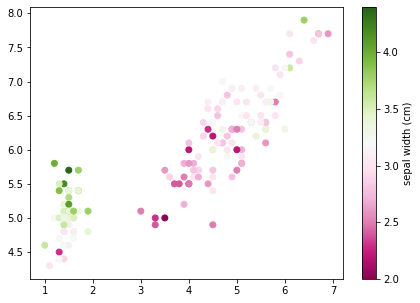

In [10]:
f = plt.figure(figsize=(7,5))
ax = f.gca() # instead of plt.gca()
dots = ax.scatter(irisdf['petal length (cm)'], irisdf['sepal length (cm)'],
           c=irisdf['sepal width (cm)'],    # the 'c' parameter specifies the feature to use for coloring
           cmap='PiYG')                     # the cmap parameter specifies the colormap
# adding colorbar
plt.colorbar(dots, label='sepal width (cm)')

Similarly, we can use a diverging colormap, e.g. to indicate the target value. 

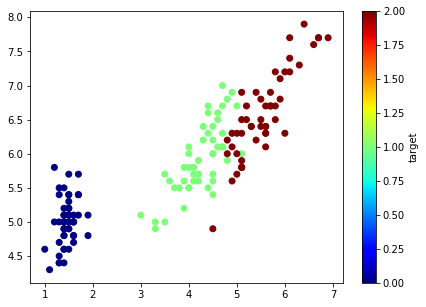

In [11]:
f = plt.figure(figsize=(7,5))
ax = f.gca() # instead of plt.gca()
dots = ax.scatter(irisdf['petal length (cm)'], irisdf['sepal length (cm)'],
           c=irisdf['target'],    # the 'c' parameter specifies the feature to use for coloring
           cmap='jet')                     # the cmap parameter specifies the colormap
# adding colorbar
plt.colorbar(dots, label='target')

Obviously, the colorbar makes little sense here. The example was mainly added for the sake of completeness. 

Instead, we should to use a legend. The matplotlib `legend` command is quite smart and can infer all required information from a plot. However, we need to make three tweaks:
1. add "label" information to the plotted dots.
2. use the `plot` command instead of `scatter`, since the latter doesn't support the "label" parameter.
3. add the different species separately since only one label can be specified per plot command.

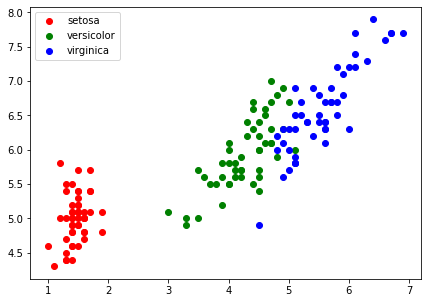

In [12]:
f = plt.figure(figsize=(7,5))
ax = f.gca() # instead of plt.gca()
for lab,c in zip(iris['target_names'], ['red', 'green', 'blue']): #loop over species
    ax.plot(irisdf['petal length (cm)'][irisdf['species']==lab], 
            irisdf['sepal length (cm)'][irisdf['species']==lab],
            color=c,    # specifies the color
            marker='o', # specifies the marker
            linestyle='', # orevents drawing a line
            label=lab) # adds label information to the dots
ax.legend()

## Brain networks

The "Brain Networks" dataset contains the activity of 62 brain regions of 920 time points. We will analyse the correlation between those time series. The dataset is available on Canvas ("brain_networks.csv").

First we load the data set.

This dataset has three header rows (0, 1 and 2) and one index column.

The highest level is the brain network, the middle level the brain node, and the lowest level is the hemishpese (left or right hemisphere).

In [0]:
import pandas as pd

# Load the brain networks example dataset
df = pd.read_csv('brain_networks.csv', header=[0, 1, 2], index_col=0)
df


FileNotFoundError: ignored

Let's calculate the correlation between brain networks. Correlation is similar to covariance, except that it also takes the series' standard deviation into account.

Remember the equation for covariance:

\begin{equation*}
cov(\mathbf{x},\mathbf{y}) = \frac{\sum_i \left(x_i-\langle x\rangle \right) \left(y_i-\langle y\rangle \right)}{n} 
\end{equation*}

with $\langle x \rangle$ denoting the mean of $x$.

Correlation is the covariance divided by the product of the two standard deviations:

\begin{equation*}
cov(\mathbf{x},\mathbf{y}) = \frac{\sum_i \left(x_i-\langle x\rangle \right) \left(y_i-\langle y\rangle \right)}
{n \cdot \sigma_x \cdot \sigma_y} 
\end{equation*}

Note that in case of unit variance, like after normalisation of the variables using `sklearn.StandardScaler`, both standard deviations will be one and therefore correlation will be equal to covariance. 

We can compute the correlation matrix of a dataframe using the following:

In [0]:
corrmat = df.corr()
corrmat

The correlation matrix is a square matrix and the values range from -1 to 1.

A correlation of 1 means that two series are fully correlated, that is, series $/mathbf{x}$ is the same as $/mathbf{y}$, except for potential scaling and translation (i.e., multiplication and/or addition of a constant).

A correlation of -1 means that two series are exactly the "opposite" of each other. They are "anticorrelated".

Both correlation of -1 and 1 mean that the two series are fully predictable.

A correlation of 0 means that the two values are uncorrelated., that is, series $/mathbf{x}$ is not linearly  predictable from series $/mathbf{y}$.

#### Correlation matrix
Now, let's plot the correlation matrix. It's a square matrix with possible values between -1 and 1.

In [0]:
f = plt.figure(figsize=(4,6))
ax = f.gca()
ax.imshow(corrmat.values)

### Task
1. Add a colorbar to the figure.
2. make the figure 7 inch large and square.
2. go to the [matplotlib colormap tutorial](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html), have a look at the available colormaps and choose a diverging colormap of your liking.
3. use the documentation of the `imshow` command to find out how to change the colormap. Hint: use `plt.imshow?` to display the documentation for `imshow`.
4. Scale the colormap such that the minimum value it reports is -1 and the maximum is 1. The mean will be zero. Hint: Look at the `vmin` and `vmax` parameters in the documentation.
5. Save the figure in PNG format with 150 dpi. 
6. Verify that the saved figure has the dimensions 7x7 inch. Hint: Open Word, create a new document, insert the figure, right click -> "Size and Position", check "Original Size". You may have to convert centimeters to inches.

In [0]:
# add your code here.

## Coronavirus campaign continued — Explorative analysis
1. Download the newest version of th coronavirus dataset from https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset .

2. Plot the ...
 * number of cases in Hubei over time
 * number of deaths in Hubei over time
 * infection rate over time (new cases per existing cases)
 * mortality rate in Hubei over time (deaths per cases)
 * recovery rate in Hubei over time (recoveries per cases)
 
3. Plot a bar chart that shows the number of cases in Mainland China vs. all other countries listed. Sort bars in decreasing order. Hint: Look at `matplotlib.pyplot.hist` for how to make a bar histogram.

In [0]:
# add your code here

## Advanced data campaign 1 - data cleaning
1. Standardise the column 'Country' (i.e. 'China' vs. 'Mainland China')
2. Standardise the format of the date strings in 'Date' and 'Last Update'. Consult the documentation for `pandas.to_datetime`.

In [0]:
# add your code here

## Advanced data campaign 2 - explorative
* plot the number of cases in Hubei and number of recoveries
* Can you estimate the recovery lag, i.e. how long is the average duration between recording of a case and recovery?
* Can you apply the estimated lag to the calculation of the mortality rate (i.e. calculate mortality rate with appropriate lag)?

In [0]:
# add your code here.